# 7.1 투표 기반 분류기

앙상블 = '대중의 지혜'    

결정 트리의 앙상블 = '랜덤 포레스트'

In [9]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- 더 좋은 분류기를 만드는 매우 간단한 방법은 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것이다.  


- 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것을 **직접투표** 라고 한다    


- 개별 분류기 중 가장 뛰어난 것 보다 많고 다양한 약한 학습기의 모음이 정확도 높은 경우가 많다  



- 앙상블 방법은 예측기가 가능한 한 **독립적**일 때 좋다



각 분류기가 **약한 학습기 (week learner)** 일지라도 충분하게 많고 다양하다면 앙상블은 **강한 학습기 (strong learner)** 가 될 수 있다.

In [5]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

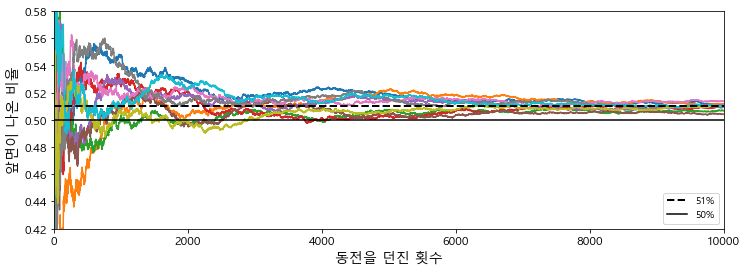

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("동전을 던진 횟수")
plt.ylabel("앞면이 나온 비율")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

동전을 많이 던질수록 확률은 증가한다. 이는 **큰 수의 법칙** 때문인데 동전을 자꾸 던질수록 앞면이 나오는 비율은 점점 더 앞면이 나올 확률 51%에 가까워진다. 

### hard voting

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


간접투표 : 개별 분류기의 예측을 평균 내어 확률이 높은 투표에 비중 , 직접투표 방식보다 성능 높음  

  -  voting="hard" -> voting="soft" 
  -  SVC에서 probability= True


### soft voting

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# 7.2 배깅과 페이스팅

훈련 세트에서 중복을 허용하여 샘플링 하는 방법: 복원 추출 같은건가 = '배깅'= '부트스트래핑'

" 중복을 허용하지 않고 샘플링 하는 방법: 비복원 추출 같은건가 = '페이스팅'

일반적으로 앙상블의 결과는 하나의 예측기를 훈련시킬때보다 편향은 비슷하지만 분산이 줄어든다.  

예측기는 모두 동시에 다른 CPU 코어나 서버에서 병렬로 학습 시킬 수 있다. 이와 유사하게 예측도 병렬로 수행할 수 있다. 이런 확장성 덕분에 배깅과 페이스팅의 인기가 높다.


## 7.2.1 사이킷런의 배깅과 페이스팅

In [19]:
# 배깅

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) #n_jobs: cpu코어수 결정 -1는 모두 사용
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
# 페이스팅

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.856


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

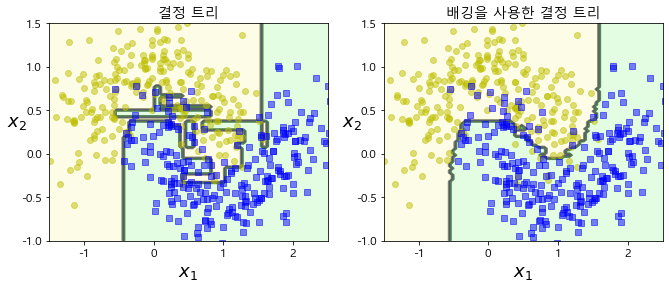

In [23]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리", fontsize=14)
plt.show()

앙상블의 예측이 결정 트리 하나의 예측보다 훨씬 일반화가 잘 된 것 같다. 앙상블은 비슷한 편향에서 더 작은 분산을 만든다.


리샘플링= 붓스트래핑은 다양성을 증가시키므로 배깅이 페이스팅 보다 편향이 조금 더 높다. 그러나 예측기 간의 상관관계를 줄이기 때문에 앙상블의 분산을 감소 시킨다.  


일반적으로는 배깅을 선호, cpu 여유가 있다면 배깅과 페이스팅 모두 평가 후 좋은것 선택한다.  


 => 내 생각엔 리샘플링을 하다 보니 선택 할 수 있는 샘플이 항상 많기 때문에 다양성을 증가시키면서 상관관계도 줄이는듯 하다

# 7.2.2 oob 평가

배깅을 사용하면 어떤 샘플은 한 예측기에 여러 번 샘플링 되고 어떤것은 전혀 선택되지 않을 수 있다. 

선택되지 않은 훈련 샘플을 oob 샘플이라고 한다. 예측기가 훈련되는 동안에는 obb 샘플을 사용하지 않으므로 검증세트나 교차검증을 사용하지 않고 obb샘플을 사용해 평가할 수 있다. 

In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40) #obb_score=True 는 훈련이 끝난후 자동으로 obb 평가를 시작한다.
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [13]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [25]:
bag_clf.oob_decision_function_
#array[0]: 음성클래스 속할 확률 array[1]: 양성클래스 속할 확률

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

# 7.3 랜덤 패치와 랜덤 서브스페이스

특성 샘플링도 가능하다. 특히 매우 고차원의 데이터셋을 다룰 때 유용하다.  


훈련 특성과 샘플을 모두 샘플링하는(bootstrap=False, max_samples=1.0) 것을 '랜덤 패치 방식'

훈련 샘플을 모두 사용하고 특성은 샘플링 하는 (bootstrap=True, max_samples=1.0)  ' 랜덤 서브스페이스 방식'

# 7.4 랜덤 포레스트

**랜덤 포레스트** 는 일반적으로 배깅 방법(또는 페이스팅)을 적용한 결정 트리의 앙상블이다. 전형적으로 max_samples를 훈련 세트의 크기로 지정한다. 

In [26]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [27]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

랜덤 포레스트 알고리즘은 트리의 노드를 분할할 때 전체 특성 중에서 최선의 특성을 찾는 대신 무작위로 선택한 특성 후보 중에서 최적의 특성을 찾는 식으로 무작위성을 더 주입한다. 

## 7.4.1 엑스트라 트리

랜덤 포레스트를 더욱더 무작위 하게 만든 것 = **익스트림 랜덤 트리** = **엑스트라 트리**  

편향이 늘어나지만 대신 분산을 낮추게 된다.  


일반적인 랜덤 포레스트 보다 엑스트라 트리가 훨씬 빠르다. 엑스트라 트리를 만들려면 사이킷런의 ExtraTreesClassifier를 사용한다.

그러나 랜덤 포레스트와 엑스트라 트리 중 뭐가 더 좋다고 예단하긴 어렵고 둘 다 교차 검증으로 비교하는게 좋다.

## 7.4.2 특성 중요도

랜덤 포레스트의 장점은 특성의 상대적 중요도(가중치의 평균)를 측정하기 쉽다는 것이다. 사이킷런은 어떤 특성을 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정한다.더 정확히 말하면 가중치 평균이며 각 노드의 가중치는 연관된 훈련 샘플 수와 같다.  


사이킷런은 훈련이 끝난 뒤 특성마다 자동으로 이 점수를 계산하고 중요도의 전체 합이 1이 되도록 결괏값을 정규화 한다. 이 값은 feature_importances_ 변수에 저장되어 있다.
특성을 선택할 때 어느 특성이 중요한지 빠르게 확인 할 수 있어 매우 편리하다.

In [28]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf= RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


가장 중요한 특성은 꽃잎의 길이(44%)와 너비(42%)이고 꽃받침의 길이와 너비는 비교적 덜 중요해 보인다.

# 7.5 부스팅

**부스팅**은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법을 말한다. 부스팅 방법의 아이디어는 앞의 모델을 보완해나가면서 일련의 예측기를 학습시키는 것이다. 부스팅 방법에는 여러가지가 있지만 가장 인기 있는 것은 **아다부스트** (AdaBoost)와  **그래디언트 부스팅**(Gradient Boosting) 이다.

## 7.5.1 아다부스트

이전 모델이 과소적합 했던 훈련 샘플의 가중치를 높이는 것이다. 이렇게 하면 새로운 예측기는 학습하기 어려운 샘플에 맞춰지게 된다.  


첫번째 분류기를 훈련세트에서 훈련, 예측 -> 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높임 -> 두번째 분류기는  
업데이트 된 가중치를 사용해 훈련, 예측 -> 다시 가중치를 업데이트  





예측기가 정확할수록 가중치가 더 높아지게 되기에 가중치의 합이 가장 큰 클래스가 예측 결과가 된다

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

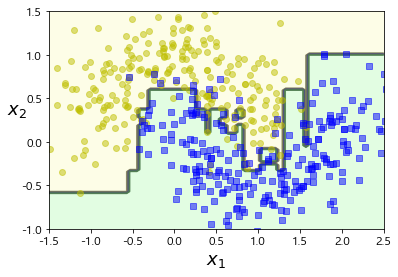

In [33]:
plot_decision_boundary(ada_clf, X, y)

연속된 기법에는 중요한 단점이 있다. 각 예측기에는 이전 예측기가 훈련되고 평가 된 후에 학습될 수 있기 때문에 병렬화를 할 수 없다. 그러므로 배깅이나 페이스팅 만큼 확장성이 좋지 않다.


아다부스트의 알고리즘을 더 자세히 들여다 보자, 각 샘플 가중치 $ w^{(i)}$는 초기에 $\frac{1}{m}$로 초기화 된다. 첫 번째 예측기가 학습되고, 가중치가 적용된 에러율 $r_1$이 훈련 세트에 대해 계산된다.

![en1](./images/en1.png)

예측기가 정확할 수록 가중치가 더 높아지게 된다. 만약 무작위로 예측하는 정도라면 가중치가 0에 가까울 것이다. 그러나 그 보다 나쁘면 가중치는 음수가 된다.

![en2](./images/en2.png)

즉 잘못 분류된 샘플의 가중치가 증가하게 된다.

![en3](./images/en3.png)

그런 다음 모든 샘플의 가중치를 정규화 한다.(즉 $\sum w^{(i)}$으로 나눈다)  

마지막으로 새 예측기가 업데이트 된 가중치를 사용해 훈련되고 전체 과정이 반복된다. 이 알고리즘은 지정된 예측기 수에 도달하거나 완벽한 예측기가 만들어 지면 중지된다.

예측을 할 때 아다부스트는 단순히 모든 예측기의 예측을 계산하고 예측기 가중치 $a_i$를 더해 예측 결과를 만든다.

![en4](./images/en4.png)

사이킷런은 SAMME 라는 아다부스트의 다중 클래스 버전을 사용한다. 클래스가 두 개 뿐일 때는 SAMME가 아다부스트와 동일하다. 예측기가 클래스의 확률을 추정할 수 있다면 사이킷런은 SAMME.R이라는 SAMME 변종을 사용한다. 이 알고리즘은 예측값 대신 클래스 확률에 기반하며 일반적으로 성능이 더 좋다,  

다음 코드는 200개의 아주 얕은 결정 트리를 기반으로 하는 아다부스트 분류기를 훈련시킨다. 

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

아다부스트 앙상블이 훈련 세트에 과대적합 되면 hyperparameter 수를 줄이거나 규제를 더 강하게 해야한다.

## 7.5.2 그래디언트 부스팅

아다부스트처럼 그래디언트 부스팅은 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가한다. 하지만 아다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 **잔여오차**에 새로운 예측기를 학습시킨다.   

결정 트리를 기반 예측기로 사용하는 간단한 회귀 문제를 풀어보자. 이를 **그래디언트 트리 부스팅** 또는 **그래디언트 부스티드 회귀 트리**라고 한다.

In [34]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
# 첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련시킨다.
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
# 두번째 예측기가 만든 잔여 오차에 세번째 회귀 모델을 훈련시킨다.
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [42]:
tree_reg1

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

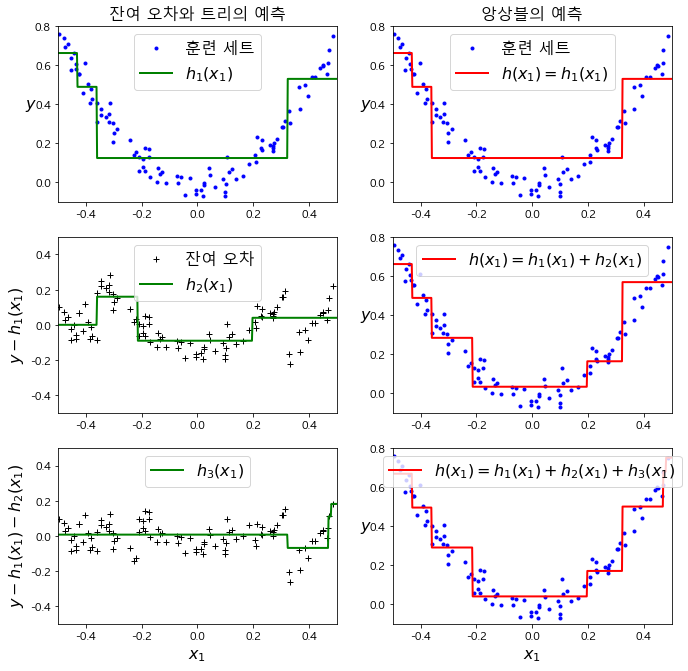

In [41]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("잔여 오차와 트리의 예측", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("앙상블의 예측", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="잔여 오차")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

왼쪽 열은 이 세 트리의 예측이고 오른쪽 열은 앙상블의 예측이다.   

learning_rate 매개변수가 각 트리의 기여 정도를 조절한다. 이를 0.1처럼 낮게 설정하면 앙상블을 훈련세트에 학습 시키기 위해 많은 트리가 필요하지만 일반적으로 예측 성능은 좋아진다. 이는 **shrinkage**라고 부르는 규제방법이다

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
print('y_pred :', gbrt.predict(X_new))

y_pred : [0.75026781]


In [45]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

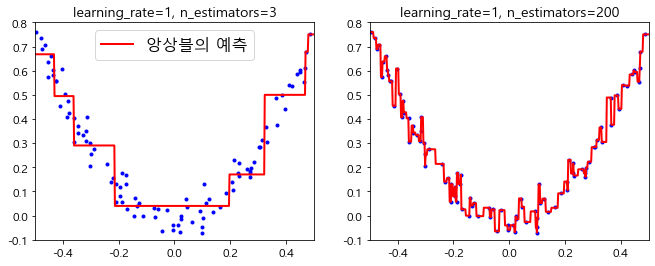

In [46]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="앙상블의 예측")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

왼쪽은 훈련 세트를 학습하기에는 트리가 충분하지 않은 반면 오른쪽은 트리가 너무 많아 훈련세트에 과대적합 되었다. 최적의 트리 수를 찾기 위해서는 조기종료 기법을 사용할 수 있다. 간단하게 구현하려면 staged_predict() 를 사용한다. 

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)] # 최적의 트리수를 찾기 위한 조기종료 기법
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

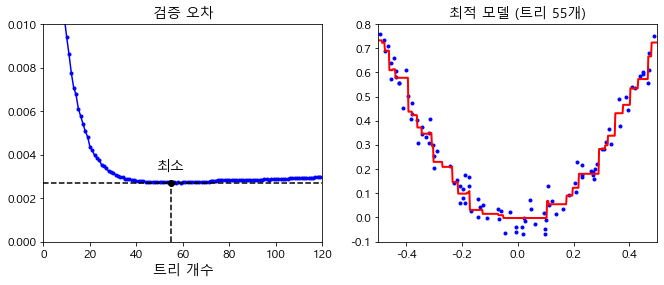

In [49]:
min_error = np.min(errors)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "최소", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("트리 개수")
plt.title("검증 오차", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("최적 모델 (트리 %d개)" % bst_n_estimators, fontsize=14)

plt.show()

왼쪽은 검증오차이고 오른쪽은 최적 모델의 예측이다.

In [48]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료
            # 연속해서 5번의 반복동안 검증오차가 향상되지 않으면 훈련을 멈춘다.

사용할 훈련 샘플의 비율의 지정할때 subsample 

subsample=0.25 는 무작위로 선택된 25%의 훈련샘플로 학습 -> 편향 커지지만 분산 작아지고 속도가 빨라짐 ; 확률적 그래디언트 부스팅

# 7.6 스태킹

예측기의 예측을 각각 구해 취합하는것 말고 취합하는 모델을 훈련시키는 방법

홀드아웃: 훈련세트를 두개의 서브셋으로 쪼갠뒤 첫번째 서브셋은 첫번째 레이어의 예측을 훈련시키기 위해 쓰임

스태킹(stacking)의 과정은 다음과 같다.

1. 학습 데이터셋에서 샘플링을 통해 서브셋1(subset-1)을 만들고, 이 서브셋을 이용해 각 모델을 학습시킨다.  
2. 서브셋2(subset-2) 학습 시킨 모델을 이용해 각 모델의 예측값을 출력하고 예측값들을 합친다.  
3. 합쳐진 예측값들을 입력 특성(input feature)로 사용하는 새로운 모델(meta learner, blender)을 학습시킨다.